<a href="https://colab.research.google.com/github/RahulParajuli/AccidentDetectionSystem_using_InceptionV3/blob/main/automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def library ():
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns

In [ ]:

import pandas as pd
data = pd.read_csv("/content/aq_kathmandu_us_diplomatic_post_phora_durbar_kathmandu.csv")
data.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,o3,0.051,ppm,27.712463,85.315704
1,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T18:15:00+00:00,2021-03-13T00:00:00+05:45,pm25,69.000,µg/m³,27.712463,85.315704
2,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,pm25,69.000,µg/m³,27.712463,85.315704
3,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T17:15:00+00:00,2021-03-12T23:00:00+05:45,o3,0.030,ppm,27.712463,85.315704
4,3460,US Diplomatic Post: Phora Durbar Kathmandu,Kathmandu,NP,2021-03-12T16:15:00+00:00,2021-03-12T22:00:00+05:45,o3,0.030,ppm,27.712463,85.315704


In [ ]:
class second():
  csv_from_adyelta = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
  def res(csv_from_adyelta):
    import pandas as pd
    df_import_url = pd.read_csv(csv_from_adyelta)
    df_import_url.head()
  res(csv_from_adyelta)

In [ ]:
import pandas as pd

cleaner_modes = ['remove row', 'mean', 'mode']
def clean_me(dataframe,
             detect_binary = True,
             numeric_dtype=True,
             one_hot = True,
             cleaner_modes = "mean",
             normalize = True,
             datetime_columns = [],
             remove_columns=[],
             verbose = True):
  df = dataframe.copy()
  print("data is cleaning")
  assert type(one_hot) == type(True), "please ensure that one hot param is bool"
  assert type(df) == type(pd.DataFrame()), "parameter 'df' should be pandas df"
  print("assert")
  if len (datetime_columns)>0:
    print("casting datetime columns to datetime dtype")
    df = cols_to_datetime_dtype(df, datetime_columns)

    if len(remove_columns)>0:
      print("performing removal of unwanted columns")
      df = remove_column_df(df,remove_columns)
    
    if detect_binary:
      print("Performing one hot encoding...")
    
    if numerical_dtype:
      print("converting columns to numeric dtype when possible...")
    
    if one_hot:
      print("performing one hot encoding...")
      cols_num_before = df.shape[1]
      df = one_hot_df(df)
      print("one hot encoding done, added {} new columns".format(df.shape[1]-cols_num_before))

    if cleaner_mode != False:
      print("performing dataset normalization")
    
    if normalize:
      print ("performing dataset normalization")
      df = normalize_df (df,exclude=datetime_columns, verbose=verbose)
    print("auto data clean finished")
    return df

  def datetime_dtype_series(series):
    try:
      series = pd.to_datetime(series)
      print("converted column {} to datetime dtype".format(series.name))
      return series
    except Exception as err:
      print("ERROR {}".format(err))
  
  def cols_to_datetime_dtype(df,cols):
    for c in cols:
      df[c] = datetime_dtype_series(df[c])
    return df
  
  def remove_column_df(df,remove_columns):
    stat = 0
    for col in remove_columns:
      assert col in df.columns.to_list(), "{} is marked to be removed, but it doesnt exist in the dataset".format(col)
      df.drop(columns=col, inplace = True)
      stat += 1
    print("removed {} columns successfully.".format(stat))
    return df

  def detect_binary_df(df):
    stat_cols = 0
    stat_cols_names = []
    stat_rows = 0
    for col in df.columns.to_list():
      if len(df[col].unique().tolist()) == 2:
        unique_values = df[col].unique().tolist()
        unique_values.sort()
        df[col] = df[col].replace(unique_values[0],0)
        df[col] = df[col].replace(unique_values[1],1)
        stat_cols += 1
        stat_cols_names.append(col)
        stat_rows += df.shape[0]
      return df

  def convert_numeroc_series(series, force = False):
    stats = 0
    if force:
      stats += series.shape[0]
      return pd.to_numeric(series, errors='coerce'), stats
    else:
      non_numeric_count = pd.to_numeric(series, errors = 'coerce').isna().sum()
      if non_numeric_count/series.shape[0] < 0.25:
        stats += series.shape[0]
        if non_numeric_count != 0:
          print("{} minority(minority means < %25 of '{}' entries) values that cannot be converted to numeric dtype in column '{}' have been set to NaN, nan cleaner function will deal with them".format(non_numeric_count, series.name, series.name))
        return pd.to_numeric(series,errors='coerce'), stats
      else:
        return series, stats

  def convert_numeric_df(df,exclude=[], force = False):
    stats = 0
    for col in df.columns.to_list():
      if col in exclude:
        continue
      df[col], stats_temp = convert_numeric_series(df[col], force)
    stats += stats_temp
    print("converted {} cells to numeric dtypes".format(stats))
    return df
  
  def one_hot_df(df):
    return pd.get_dummies(df)
  
  def clean_na_series(series, cleaner_mode):
    if cleaner_mode == "remove row":
      return series.dropna()
    elif cleaner_mode == "mean":
      mean = series.mean()
      return series.fillna(mean)
    elif cleaner_mode == "mode":
      mode = series.mode()[0]
      return series.fillna(mode)
    elif cleaner_mode == "False":
      return series
    else:
      return series.fillna(cleaner_mode)
  
  def clean_na_df(df,cleaner_modes):
    stats={}
    for col in df.columns.to_list():
      if df[col].isna().sum() > 0:
        stats[col + "NaN values"] = df[col].isna().sum()
        try:
          df[col] = clean_na_series(df[col], cleaner_modes)
        except:
          pass
      print("cleaned the following NaN values: {}".format(stat))
    return df

  def normalize_df(df, exclude=[]):
    stats = 0
    for col in df.columns.to_list():
      if col in exclude:
        continue
      col_unique = df[col].unique().tolist()
      if len(col_unique)==2 and 0 in col_unique and 1 in col_unique:
        continue
      else:
        df[col] = (df[col]-df[col].mean())/df[col].std()
        stats += df.shape[0]
      print("normalized {} cells".format(stats))
    return df

In [ ]:
clean_me(data,
             detect_binary = True,
             numeric_dtype=True,
             one_hot = True,
             cleaner_modes = "mean",
             normalize = True,
             datetime_columns = [],
             remove_columns=[]
         )

In [ ]:
# self.detect_binary(data)
!pip install fuzzywuzzy

In [ ]:
def clean(data):
  df = pd.read_csv(data)
  return df

In [ ]:
clean("/content/standard.csv")

In [ ]:
data = "/content/nba_all_elo.csv"
def clean(data):
  standardStr = pd.read_csv(data,'r')
  # with open(data,'r') as file:
  #     standardStr = file.read()
  a = standardStr.dtype
  print(a)
  print(standardStr)
# nullValue = standardStr.isnull()

In [ ]:
clean(data)

In [ ]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [ ]:
df = pd.read_csv('/content/nba_all_elo.csv','r')
df.head()

In [ ]:
import numpy as np
import pandas as pd
data = "/content/nba_all_elo.csv"
df = pd.read_csv(data,'r')

def char_finder(data_frame, series_name):
    cnt=0
    print(series_name)
    for row in data_frame[series_name]:
        try:
            float(row)  
            pass
        except ValueError:
            print(data_frame.loc[cnt, series_name], "-> at row:"+str(cnt))
        cnt+=1
    pd.isnull(data_frame).count()

def char_fixer(data_frame, series_name):
    cnt=0
    for row in data_frame[series_name]:
        try:
            float(row)  
            pass
        except ValueError:
            data_frame.drop([cnt], inplace=True)
        cnt+=1
    data_frame[series_name] = data_frame[series_name].astype('float64', errors='raise')
    data_frame.reset_index(drop=True, inplace=True)

def num_finder(data_frame, series_name):
    cnt=0
    for row in data_frame[series_name]:
        try:
            int(float(row))
        except ValueError:
            if row=='True' or row=='False':
                print(data_frame.loc[cnt, series_name], "-> at row:"+str(cnt))
            else:
                pass
        else:
            print(data_frame.loc[cnt, series_name], "-> at row:"+str(cnt))
        cnt+=1


# def null_finder(data_frame,series_name):
#   count = 0
#   print(series_name)
#   for row in data_frame[series_name]:
#     try:
#       float(row)
#       pass
#     except ValueError:
#       print(isna(data_frame))
#       print(data_frame.isnull(count,series_name), "-> at row: "+str(count))
#     count += 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


FileNotFoundError: ignored

In [ ]:
char_finder(df, 'gameo')

Streaming output truncated to the last 5000 lines.
60658,201311150MIA,NBA,0,2014,11/15/2013,9,0,MIA,Heat,110,1686.4232,1688.9985,59.042931,DAL,Mave -> at row:121314
60658,201311150MIA,NBA,1,2014,11/15/2013,9,0,DAL,Mave -> at row:121315
60659,201311150PHO,NBA,1,2014,11/15/2013,8,0,BRK,Nets,100,1497.5377,1502.9888,40.853504,PHO,Suns,98,1431.5156,1426.0646,A,W,0.45125717,NULL -> at row:121316
60659,201311150PHO,NBA,0,2014,11/15/2013,9,0,PHO,Suns,98,1431.5156,1426.0646,32.892715,BRK,Nets,100,1497.5377,1502.9888,H,L,0.54874283,NULL -> at row:121317
60660,201311150SAC,NBA,1,2014,11/15/2013,8,0,DET,Pistons,97,1401.4332,1413.6906,31.653656,SAC,Kings,90,1417.3739,1405.1166,A,W,0.33907741,NULL -> at row:121318
60660,201311150SAC,NBA,0,2014,11/15/2013,8,0,SAC,Kings,90,1417.3739,1405.1166,30.805399,DET,Pistons,97,1401.4332,1413.6906,H,L,0.66092259,NULL -> at row:121319
60661,201311150TOR,NBA,1,2014,11/15/2013,7,0,CHI,Bulls,96,1524.3734,1543.2295,45.061214,TOR,Rapto -> at row:121320
60661,201311150

In [ ]:
df.head()

,gameo,de,",game_id,lg_id,_iscopy,yea","_id,date_game,seasongame,is_playoffs,team_id,f","an_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_f","an,opp_pts,opp_elo_i,opp_elo_n,game_location,game_","esult,fo","ecast,notes"
0,"1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Hu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Kn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Kn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Fa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
char_finder(df, "gameo")

Streaming output truncated to the last 5000 lines.
60658,201311150MIA,NBA,0,2014,11/15/2013,9,0,MIA,Heat,110,1686.4232,1688.9985,59.042931,DAL,Mave -> at row:121314
60658,201311150MIA,NBA,1,2014,11/15/2013,9,0,DAL,Mave -> at row:121315
60659,201311150PHO,NBA,1,2014,11/15/2013,8,0,BRK,Nets,100,1497.5377,1502.9888,40.853504,PHO,Suns,98,1431.5156,1426.0646,A,W,0.45125717,NULL -> at row:121316
60659,201311150PHO,NBA,0,2014,11/15/2013,9,0,PHO,Suns,98,1431.5156,1426.0646,32.892715,BRK,Nets,100,1497.5377,1502.9888,H,L,0.54874283,NULL -> at row:121317
60660,201311150SAC,NBA,1,2014,11/15/2013,8,0,DET,Pistons,97,1401.4332,1413.6906,31.653656,SAC,Kings,90,1417.3739,1405.1166,A,W,0.33907741,NULL -> at row:121318
60660,201311150SAC,NBA,0,2014,11/15/2013,8,0,SAC,Kings,90,1417.3739,1405.1166,30.805399,DET,Pistons,97,1401.4332,1413.6906,H,L,0.66092259,NULL -> at row:121319
60661,201311150TOR,NBA,1,2014,11/15/2013,7,0,CHI,Bulls,96,1524.3734,1543.2295,45.061214,TOR,Rapto -> at row:121320
60661,201311150

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 8 columns):
 #   Column                                              Non-Null Count   Dtype 
---  ------                                              --------------   ----- 
 0   gameo                                               126314 non-null  object
 1   de                                                  84227 non-null   object
 2   ,game_id,lg_id,_iscopy,yea                          36325 non-null   object
 3   _id,date_game,seasongame,is_playoffs,team_id,f      15320 non-null   object
 4   an_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_f        5410 non-null    object
 5   an,opp_pts,opp_elo_i,opp_elo_n,game_location,game_  570 non-null     object
 6   esult,fo                                            4 non-null       object
 7   ecast,notes                                         2 non-null       object
dtypes: object(8)
memory usage: 7.7+ MB


In [ ]:
df['gameo'].unique()

array(['1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300,1293.2767,40.29483,NYK,Knicks,68,1300,1306.7233,H,L,0.64006501,',
       '1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300,1306.7233,41.70517,TRH,Huskies,66,1300,1293.2767,A,W,0.35993499,',
       '2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.63110125,',
       ..., '63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavalie',
       '63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavalie',
       '63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Wa'],
      dtype=object)

In [ ]:
df.value_counts()

Series([], dtype: int64)

In [ ]:
df.isnull().sum()

gameo                                                      0
de                                                     42087
,game_id,lg_id,_iscopy,yea                             89989
_id,date_game,seasongame,is_playoffs,team_id,f        110994
an_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_f          120904
an,opp_pts,opp_elo_i,opp_elo_n,game_location,game_    125744
esult,fo                                              126310
ecast,notes                                           126312
dtype: int64

In [ ]:
import missingno as msno

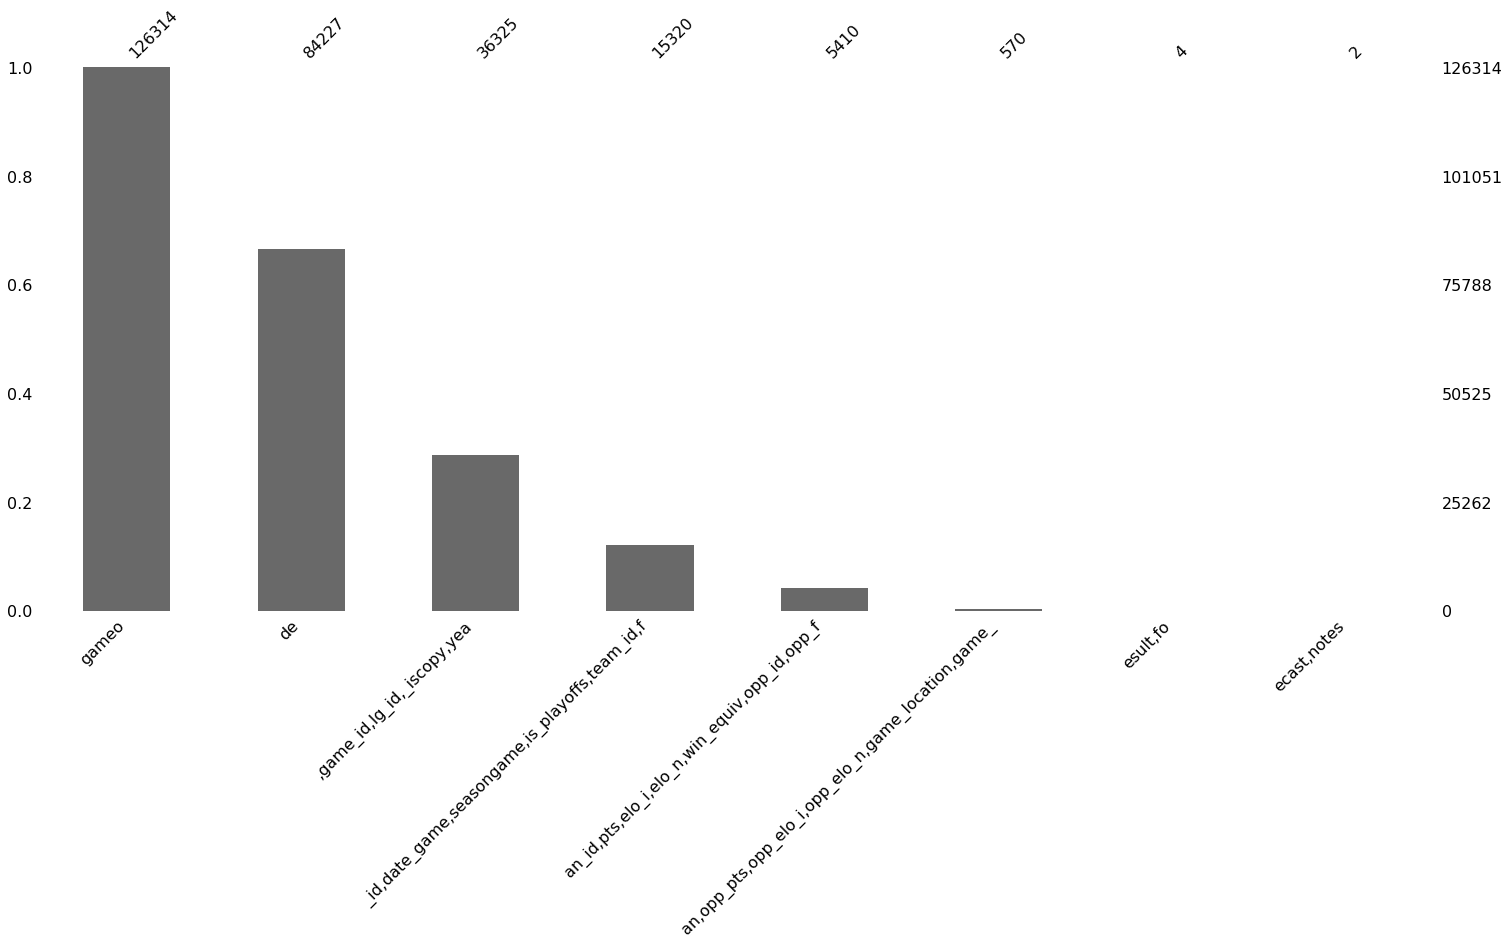

In [ ]:
msno.bar(df)

In [ ]:
msno.matrix(df)

In [ ]:
msno.heatmap(df)

In [ ]:
msno.dendrogram(df)

In [ ]:
df.info()

In [ ]:
def means(df):
  meanvalue = df.values.mean()
  print(meanvalue)
  # return meanvalue
means(data)

In [ ]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


In [ ]:

def columndeleter(data_frame, column_name):
    cnt=0
    print(column_name)
    for row in data_frame[column_name]:
        try:
            float(row)  
            pass
        except ValueError:
            print(data_frame.loc[cnt, column_name], "-> at row:"+str(cnt))
            pd.isnull(data_frame).count()
        cnt+=1
    
    data_frame.reset_index(drop=True, inplace=True)

In [ ]:
import pandas as pd
data = pd.read_csv("/content/nba_all_elo.csv")

In [ ]:
data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [ ]:
columndeleter(data, "game_id")

199701250IND -> at row:79788
199701250IND -> at row:79789
199701250POR -> at row:79790
199701250POR -> at row:79791
199701250VAN -> at row:79792
199701250VAN -> at row:79793
199701250WSB -> at row:79794
199701250WSB -> at row:79795
199701260MIL -> at row:79796
199701260MIL -> at row:79797
199701260NYK -> at row:79798
199701260NYK -> at row:79799
199701260SEA -> at row:79800
199701260SEA -> at row:79801
199701270GSW -> at row:79802
199701270GSW -> at row:79803
199701270MIA -> at row:79804
199701270MIA -> at row:79805
199701280DAL -> at row:79806
199701280DAL -> at row:79807
199701280IND -> at row:79808
199701280IND -> at row:79809
199701280LAC -> at row:79810
199701280LAC -> at row:79811
199701280MIL -> at row:79812
199701280MIL -> at row:79813
199701280MIN -> at row:79814
199701280MIN -> at row:79815
199701280NJN -> at row:79816
199701280NJN -> at row:79817
199701280NYK -> at row:79818
199701280NYK -> at row:79819
199701280TOR -> at row:79820
199701280TOR -> at row:79821
199701280UTA -

KeyboardInterrupt: ignored

In [ ]:
def columndeleter(data_frame, column_name):
    cnt=0
    print(column_name)
    for row in data_frame[column_name]:
        try:
            float(row)
            while row !=0:
              if pd.isnull().sum*100 >= 95:
                new_df = dataframe['column_name'].drop
              else:
                pass
            pass
        except ValueError:
            print(data_frame.loc[cnt, column_name], "-> at row:"+str(cnt))
            pd.isnull(data_frame).count()
        cnt+=1
    
    data_frame.reset_index(drop=True, inplace=True)

In [ ]:
def columndeleter(df, column_name):
  print("deleting the column: ", column_name)
  # new_df = (df.drop['column_name'], axis=1)
  del df[column_name]
  df.head()
  return df
 
def rowdeleter(df, row_number):
  print("deleting the row number: ", row_number)
  df.drop(df.index[row_number])
  df.head()
  return df

def duplicatedeleter(df):
  print("deleting duplicate values: ")
  df.drop_duplicates()
  df.shape
  return df

def columnduplicate(df, column_name):
  print("deleting duplicate values at: ", column_name)
  df.drop_duplicates(column_name)
  df.head()
  df.shape
  return df

def description(df):
  df = df.describe()
  return df

def columnDescription(df, column_name):
  df = df[column_name].describe()
  return df

def meandata(df):
  meandf = df.mean()
  return meandf

def meancolumn(df, column_name):
  meanCol = df[column_name].mean()
  return meanCol

def median(df):
  mediandf = df.median()
  return mediandf

def mediancolumn(df, column_name):
  medianCol = df[column_name].median()
  return medianCol

def randomData(df, column_name):
  import random
  list_value = list(df[column_name])
  df2 = random.choice(list_value)
  print(df2)

In [ ]:
randomData(data, "year_id")

2005


In [ ]:
meancolumn(data, "gameorder")

31579.0

In [ ]:
rowdeleter(data, 2)

deleting the row number:  2


,gameorder,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
